In [8]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, chi2
from scipy.special import gammainc, gamma

## **а)**


In [15]:
degrees = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]
degs = np.arange(10)
n = 100
sample = []
for i in range(len(degrees)):
  for j in range(degrees[i]):
    sample.append(i)

In [20]:
x = np.arange(10)
emp_func = [np.sum(sample < i)/n for i in x]  #эмпирическая функция распределения
acc_func = uniform.cdf(x, loc=-0.5, scale = 10) #точная функция распределения

In [23]:
Δ = (n**0.5)*max([abs(emp_func[i] - acc_func[i]) for i in range(10)])
print(Δ)

1.5999999999999996


In [25]:
p_value = 0
for i in range(1, 10000):
  p_value += (-2)*((-1)**i)*np.exp(-2*i*i*Δ*Δ)
print("p-value =", p_value)

p-value = 0.011952043239196658


## **b)**


In [69]:
def gauss_pdf(x, a, b):
    return 1/(b * np.sqrt(2 * np.pi)) * np.exp(-(x - a)**2 / (2 * b**2) ) #плотность нормального распределения 

limits = []
limits.append(-np.inf)
for i in range(9):
  limits.append(i + 0.5)
limits.append(np.inf)

means = np.linspace(3, 7, 100)  #будем искать оптимальные параметры нормального распределения в таких пределах
sigmas = np.linspace(1, 5, 100) 

In [70]:
print("границы интегрирования:",limits)

границы интегрирования: [-inf, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, inf]


In [71]:
#найдем параметры нормального распределения методом максимального правдоподобия
L_max = 0
mean_best = 0
sigma_best = 0
for sigma in sigmas:
  for mean in means:    
    L1 = 1
    for i in range(len(degrees)):
      pi = integrate.quad(gauss_pdf, limits[i], limits[i+1], args = (mean, sigma))[0]
      L1 *= pi ** degrees[i]
    if L1 > L_max:
      L_max = L1
      mean_best = mean
      sigma_best = sigma


In [72]:
print(f"Оценка параметров нормального распределения: sigma = {round(sigma_best, 2)}, a = {round(mean_best, 2)}")

Оценка параметров нормального распределения: sigma = 2.7, a = 4.78


In [73]:
Δ = 0
for i in range(len(degrees)):
  pi = integrate.quad(gauss_pdf, limits[i], limits[i+1], args = (mean_best, sigma_best))[0]
  Δ += ((degrees[i] - n*pi)**2/(n*pi))

In [75]:
print(f"Оценка Δ с помощью критерия хи-квадрат: {round(Δ, 2)}")

Оценка Δ с помощью критерия хи-квадрат: 9.82


In [98]:
N = 50000
ΔK = []
for i in range(N):
    sample_i = np.random.normal(mean_best, sigma_best, n)  #формируем новую выборку с помощью найденных среднего и дисперсии
    tmp = np.linspace(0, max(max(sample_i), 9), 100)
    f_ = [np.sum(sample_i<j)/n for j in tmp]  #эмпирическая функция распределения для новой выборки
    f = [np.sum(sample<j)/n for j in tmp] #эмпирическая функция распределения для основной выборки 
    Δ_i = (n**0.5)*max([abs(f_[i] - f[i]) for i in range(len(tmp))])
    ΔK.append(Δ_i)

In [99]:
Δest = (n**0.5)* np.max(abs([np.sum(sample<j)/n for j in degs] - norm(mean_best, sigma_best).cdf(x)))
Δest

0.8390892036470188

In [101]:
ΔK_var = np.sort(ΔK) #формируем вариационный ря
k = len(ΔK_var [ΔK_var < Δest])
p_value = 1-((k-1)/N)
print(f"p_value = {round(p_value, 2)}")

p_value = 0.99


## **c)**

In [ ]:
sample

In [104]:
mean_mm = np.mean(sample) #оценки среднего и дисперсии методом моментов
sigma_mm = np.std(sample)
print(f' оценка по изначальной выборке : a = {mean_mm}, sigma {np.round(sigma_mm,2)}')

 оценка по изначальной выборке : a = 4.77, sigma 2.51


In [105]:
Δ_mm = []
N = 50000
for i in range(N):
    sample_i = np.random.normal(mean_mm, sigma_mm, n)
    mean_i = np.mean(sample_i)
    sigma_i = np.std(sample_i)
    pi = []
    mi = []
    for j in range(len(degrees)):
        pi.append(integrate.quad(gauss_pdf, limits[j], limits[j+1], args = (mean_i, sigma_i))[0])
        mi.append(len(sample_i[(sample_i >= limits[j]) & (sample_i <= limits[j+1])]))
    Δ_mm.append(sum(((mi[i] - n*pi[i])**2)/(n*(pi[i])) for i in range(len(degrees))))

In [108]:
Δ_mm_var = np.sort(Δ_mm)
k_mm = len(Δ_mm_var[Δ_mm_var<Δ])
k_mm

39438

In [109]:
p_value_mm = 1-((k_mm-1)/N)
print(f"p_value = {round(p_value_mm, 2)}")

p_value = 0.21


In [111]:
x = np.linspace(0, 30, 1000)    
Δ_mm_emp = [len(Δ_mm_var[Δ_mm_var<i])/N for i in x]  #эмпирическая функция распределения

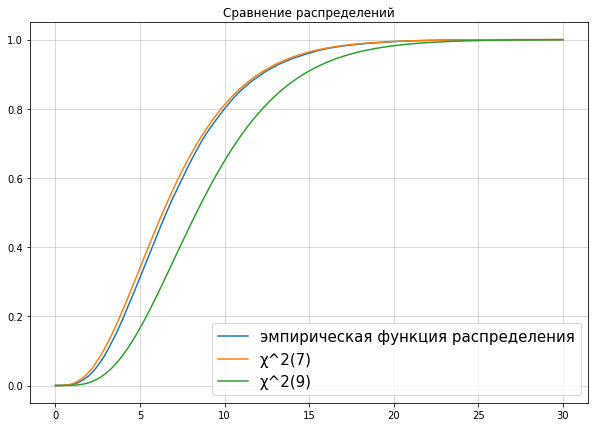

In [117]:
plt.figure(figsize=(10,7))
ax.set_xticks(np.linspace(0, max(x), 15))
ax.set_yticks(np.linspace(0, 1, 12))
plt.plot(x, Δ_mm_emp, label="эмпирическая функция распределения")
plt.plot(x, chi2.cdf(x, df = 7), label = 'χ^2(7)')
plt.plot(x, chi2.cdf(x, df = 9), label = 'χ^2(9)')
plt.title("Сравнение распределений")
plt.grid(which="major", alpha=0.6)
plt.legend(loc='best', prop={'size': 15})
plt.show()